<a href="https://colab.research.google.com/github/Kamala0910/ML-Prediction/blob/main/ML_SELF_STUDY_EX1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
pos = pd.read_excel("/content/POS_Data.xlsx", parse_dates = ['Date'])
# parse_dates - to enable pandas to read dates
print(pos.head())
print(pos.dtypes)



    SKU_ID       Date  Page_traffic  Revenue($)  Unit_price  Units_sold  \
0  SKU1009 2021-01-02           0.0           0         NaN           0   
1  SKU1009 2021-01-09           0.0           0         NaN           0   
2  SKU1009 2021-01-16           0.0           0         NaN           0   
3  SKU1009 2021-01-23           0.0           0         NaN           0   
4  SKU1009 2021-01-30           0.0           0         NaN           0   

          Manufacturer         Sector         Category Segment        Brand  \
0  Synergix solutions   Personal Care  Beauty Products  Makeup  RadiantGlow   
1  Synergix solutions   Personal Care  Beauty Products  Makeup  RadiantGlow   
2  Synergix solutions   Personal Care  Beauty Products  Makeup  RadiantGlow   
3  Synergix solutions   Personal Care  Beauty Products  Makeup  RadiantGlow   
4  Synergix solutions   Personal Care  Beauty Products  Makeup  RadiantGlow   

                       Product  
0  product_description_SKU1009  
1  produ

In [3]:
pos.describe(include = 'O')

,SKU_ID,Manufacturer,Sector,Category,Segment,Brand,Product
count,31185,31185,31185,31185,31185,31185,31185
unique,297,1,1,1,3,1,297
top,SKU1009,Synergix solutions,Personal Care,Beauty Products,Makeup,RadiantGlow,product_description_SKU1009
freq,105,31185,31185,31185,17220,31185,105


In [4]:
pos.shape

(31185, 12)

In [5]:
pos = pos.drop(['Manufacturer','Sector','Category','Brand','Product'],axis = 1) # drop them as they just have one unique value , drop Product col as it has a string value which doesnot add any meaning
pos.head()


,SKU_ID,Date,Page_traffic,Revenue($),Unit_price,Units_sold,Segment
0,SKU1009,2021-01-02,0.0,0,NaN,0,Makeup
1,SKU1009,2021-01-09,0.0,0,NaN,0,Makeup
2,SKU1009,2021-01-16,0.0,0,NaN,0,Makeup
3,SKU1009,2021-01-23,0.0,0,NaN,0,Makeup
4,SKU1009,2021-01-30,0.0,0,NaN,0,Makeup


In [6]:
pos.describe()

,Date,Page_traffic,Revenue($),Unit_price,Units_sold
count,31185,31185.000000,31185.000000,19635.000000,31185.000000
mean,2021-12-31 23:59:59.999999744,2053.829695,14386.877505,22.038169,702.274363
min,2021-01-02 00:00:00,0.000000,0.000000,0.103030,0.000000
25%,2021-07-03 00:00:00,0.000000,0.000000,16.311504,0.000000
50%,2022-01-01 00:00:00,1963.000000,14952.000000,20.746141,765.000000
75%,2022-07-02 00:00:00,3647.000000,25670.000000,25.423036,1224.000000
max,2022-12-31 00:00:00,10696.000000,48572.000000,94.133971,3386.000000
std,NaN,1979.574340,13427.614446,9.849729,647.676402


In [7]:
import datetime,calendar
print(calendar.MONDAY, calendar.TUESDAY, calendar.WEDNESDAY,calendar.THURSDAY,calendar.FRIDAY,calendar.SATURDAY,calendar.SUNDAY)


pos['weekday'] = pos['Date'].dt.dayofweek
pos['weekday'].value_counts()
# data given int the above dataset belongs to a single day of the week (day5 - SATURDAY)
pos.head()

0 1 2 3 4 5 6


,SKU_ID,Date,Page_traffic,Revenue($),Unit_price,Units_sold,Segment,weekday
0,SKU1009,2021-01-02,0.0,0,NaN,0,Makeup,5
1,SKU1009,2021-01-09,0.0,0,NaN,0,Makeup,5
2,SKU1009,2021-01-16,0.0,0,NaN,0,Makeup,5
3,SKU1009,2021-01-23,0.0,0,NaN,0,Makeup,5
4,SKU1009,2021-01-30,0.0,0,NaN,0,Makeup,5




*   All data is aggregated at a weekly level. They belong to Saturdays.
*   Missing data in Unit_price col





In [8]:
product = pd.read_excel("/content/Product_Attribute_Data.xlsx", parse_dates = ['Date'])
# parse_dates - to enable pandas to read dates
print(product.head())
print(product.dtypes)


    SKU_ID       Date  1_Star_Rating  2_Star_Rating  3_Star_Rating  \
0  SKU1009 2021-01-09           52.0           28.0           68.0   
1  SKU1009 2021-01-10           52.0           28.0           68.0   
2  SKU1009 2021-01-11           52.0           28.0           69.0   
3  SKU1009 2021-01-12           52.0           28.0           69.0   
4  SKU1009 2021-01-13           52.0           28.0           70.0   

   4_Star_Rating  5_Star_Rating    Product_availability  Image_Count  \
0          158.0          984.0  Buy Box Winner - Owned           12   
1          159.0          989.0  Buy Box Winner - Owned           12   
2          160.0          994.0  Buy Box Winner - Owned           12   
3          161.0         1000.0  Buy Box Winner - Owned           12   
4          162.0         1005.0  Buy Box Winner - Owned           12   

   Video_Count  Bullet_Count  Title_Count  Description_Length  
0            0             5           85                  58  
1            0    

In [9]:
product.describe()


,Date,1_Star_Rating,2_Star_Rating,3_Star_Rating,4_Star_Rating,5_Star_Rating,Image_Count,Video_Count,Bullet_Count,Title_Count,Description_Length
count,99331,85975.000000,84988.000000,84957.000000,84687.000000,84379.000000,99331.000000,99331.0,99331.000000,99331.000000,99331.000000
mean,2022-01-01 19:55:49.637072128,75.290038,53.501400,144.977318,295.173073,1937.907501,7.166454,0.0,6.560943,107.603820,137.196756
min,2021-01-02 00:00:00,10.000000,7.000000,16.000000,31.000000,153.000000,0.000000,0.0,4.000000,62.000000,54.000000
25%,2021-06-27 00:00:00,40.000000,29.000000,76.000000,153.000000,998.000000,2.000000,0.0,6.000000,84.000000,65.000000
50%,2022-01-01 00:00:00,68.000000,49.000000,129.000000,261.000000,1695.000000,8.000000,0.0,6.000000,100.000000,129.000000
75%,2022-07-12 00:00:00,99.000000,71.000000,192.000000,392.000000,2596.000000,11.000000,0.0,7.000000,126.000000,209.000000
max,2022-12-31 00:00:00,337.000000,240.000000,679.000000,1418.000000,9707.000000,16.000000,0.0,8.000000,173.000000,221.000000
std,NaN,46.039553,32.414642,90.798913,187.666308,1269.711505,4.948544,0.0,0.989463,28.611333,61.836353


In [10]:
product.describe(include = 'O')


,SKU_ID,Product_availability
count,99331,99331
unique,297,6
top,SKU1410,Buy Box Winner - Owned
freq,435,79823


In [11]:
product.shape

(99331, 13)

In [12]:
# Drop video count col as it has only one value '0'
product = product.drop(['Video_Count'], axis = 1)

product.head()

,SKU_ID,Date,1_Star_Rating,2_Star_Rating,3_Star_Rating,4_Star_Rating,5_Star_Rating,Product_availability,Image_Count,Bullet_Count,Title_Count,Description_Length
0,SKU1009,2021-01-09,52.0,28.0,68.0,158.0,984.0,Buy Box Winner - Owned,12,5,85,58
1,SKU1009,2021-01-10,52.0,28.0,68.0,159.0,989.0,Buy Box Winner - Owned,12,5,85,58
2,SKU1009,2021-01-11,52.0,28.0,69.0,160.0,994.0,Buy Box Winner - Owned,12,5,85,58
3,SKU1009,2021-01-12,52.0,28.0,69.0,161.0,1000.0,Buy Box Winner - Owned,12,5,85,58
4,SKU1009,2021-01-13,52.0,28.0,70.0,162.0,1005.0,Buy Box Winner - Owned,12,5,85,58


In [13]:
product['weekday'] = product['Date'].dt.dayofweek
product['weekday'].value_counts()
# data given in the above dataset holds everyday data uniformly
# Let's aggregate it at a weekly level, adjusting the date to next Sat to combining it with pos dataframe. A new col - weekend_date using lambda functions is created and adjusted.

product['weekend_date'] = product['Date'].apply(lambda x: x+datetime.timedelta((calendar.SATURDAY - x.weekday())%7 ))
product.head()


,SKU_ID,Date,1_Star_Rating,2_Star_Rating,3_Star_Rating,4_Star_Rating,5_Star_Rating,Product_availability,Image_Count,Bullet_Count,Title_Count,Description_Length,weekday,weekend_date
0,SKU1009,2021-01-09,52.0,28.0,68.0,158.0,984.0,Buy Box Winner - Owned,12,5,85,58,5,2021-01-09
1,SKU1009,2021-01-10,52.0,28.0,68.0,159.0,989.0,Buy Box Winner - Owned,12,5,85,58,6,2021-01-16
2,SKU1009,2021-01-11,52.0,28.0,69.0,160.0,994.0,Buy Box Winner - Owned,12,5,85,58,0,2021-01-16
3,SKU1009,2021-01-12,52.0,28.0,69.0,161.0,1000.0,Buy Box Winner - Owned,12,5,85,58,1,2021-01-16
4,SKU1009,2021-01-13,52.0,28.0,70.0,162.0,1005.0,Buy Box Winner - Owned,12,5,85,58,2,2021-01-16


In [14]:
product['weekend_date'].dt.dayofweek.value_counts()

,count
weekend_date,
5,99331


In [15]:
product[product['SKU_ID' ]== 'SKU1011']

,SKU_ID,Date,1_Star_Rating,2_Star_Rating,3_Star_Rating,4_Star_Rating,5_Star_Rating,Product_availability,Image_Count,Bullet_Count,Title_Count,Description_Length,weekday,weekend_date
309,SKU1011,2021-01-02,29.0,21.0,49.0,99.0,694.0,Buy Box Winner - Owned,5,5,91,59,5,2021-01-02
310,SKU1011,2021-01-03,30.0,22.0,50.0,102.0,713.0,Buy Box Winner - Owned,5,5,91,59,6,2021-01-09
311,SKU1011,2021-01-04,31.0,23.0,52.0,106.0,732.0,Buy Box Winner - Owned,5,5,91,59,0,2021-01-09
312,SKU1011,2021-01-05,32.0,24.0,54.0,110.0,751.0,Buy Box Winner - Owned,5,5,91,59,1,2021-01-09
313,SKU1011,2021-01-06,33.0,25.0,56.0,113.0,770.0,Buy Box Winner - Owned,5,5,91,59,2,2021-01-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
683,SKU1011,2022-12-13,75.0,50.0,118.0,237.0,1672.0,Buy Box Winner - Owned,5,5,91,59,1,2022-12-17
684,SKU1011,2022-12-14,75.0,50.0,118.0,237.0,1672.0,Buy Box Winner - Owned,5,5,91,59,2,2022-12-17
685,SKU1011,2022-12-15,75.0,50.0,118.0,237.0,1672.0,Buy Box Winner - Owned,5,5,91,59,3,2022-12-17
686,SKU1011,2022-12-16,75.0,50.0,118.0,237.0,1672.0,Buy Box Winner - Owned,5,5,91,59,4,2022-12-17


In [16]:
product.columns

Index(['SKU_ID', 'Date', '1_Star_Rating', '2_Star_Rating', '3_Star_Rating',
       '4_Star_Rating', '5_Star_Rating', 'Product_availability', 'Image_Count',
       'Bullet_Count', 'Title_Count', 'Description_Length', 'weekday',
       'weekend_date'],
      dtype='object')

In [17]:
# separate cols that needs to be aggregated
cols = ['1_Star_Rating', '2_Star_Rating', '3_Star_Rating',
       '4_Star_Rating', '5_Star_Rating', 'Product_availability', 'Image_Count',
       'Bullet_Count', 'Title_Count', 'Description_Length']

In [18]:
prod_agg = product.groupby(['weekend_date','SKU_ID'])[cols].max().reset_index()
# grouping prod data first by weekend_date and then by SKUIDs, taking the max for each week and SKUID

In [19]:
prod_agg.head() # weekly aggregated data

,weekend_date,SKU_ID,1_Star_Rating,2_Star_Rating,3_Star_Rating,4_Star_Rating,5_Star_Rating,Product_availability,Image_Count,Bullet_Count,Title_Count,Description_Length
0,2021-01-02,SKU1011,29.0,21.0,49.0,99.0,694.0,Buy Box Winner - Owned,5,5,91,59
1,2021-01-02,SKU1014,46.0,22.0,42.0,77.0,409.0,Buy Box Winner - Owned,0,5,79,99
2,2021-01-02,SKU1024,21.0,15.0,39.0,93.0,782.0,Buy Box Winner - Owned,0,8,163,158
3,2021-01-02,SKU1025,28.0,7.0,45.0,102.0,786.0,Buy Box Winner - Owned,2,6,90,62
4,2021-01-02,SKU1036,58.0,24.0,71.0,166.0,1239.0,Buy Box Winner - Owned,12,8,126,221


In [20]:
product.shape
prod_agg.shape

(21915, 12)

In [21]:
# merge the two dataframes pos and product_agg
data = pd.merge(pos, prod_agg, how="left",left_on = ['Date','SKU_ID'], right_on = ['weekend_date','SKU_ID'])
data.head()

,SKU_ID,Date,Page_traffic,Revenue($),Unit_price,Units_sold,Segment,weekday,weekend_date,1_Star_Rating,2_Star_Rating,3_Star_Rating,4_Star_Rating,5_Star_Rating,Product_availability,Image_Count,Bullet_Count,Title_Count,Description_Length
0,SKU1009,2021-01-02,0.0,0,NaN,0,Makeup,5,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,SKU1009,2021-01-09,0.0,0,NaN,0,Makeup,5,2021-01-09,52.0,28.0,68.0,158.0,984.0,Buy Box Winner - Owned,12.0,5.0,85.0,58.0
2,SKU1009,2021-01-16,0.0,0,NaN,0,Makeup,5,2021-01-16,53.0,29.0,72.0,166.0,1022.0,Buy Box Winner - Owned,12.0,5.0,85.0,58.0
3,SKU1009,2021-01-23,0.0,0,NaN,0,Makeup,5,2021-01-23,53.0,29.0,72.0,169.0,1040.0,Buy Box Winner - Owned,12.0,5.0,85.0,58.0
4,SKU1009,2021-01-30,0.0,0,NaN,0,Makeup,5,2021-01-30,53.0,29.0,72.0,169.0,1040.0,Buy Box Winner - Owned,12.0,5.0,85.0,58.0


In [22]:
# drop weekday and weekend_date cols as we already have date col
data = data.drop(['weekend_date','weekday'], axis = 1)
data.head()
data.shape

(31185, 17)

In [23]:
# load the search dataset
search = pd.read_excel('/content/Search_Rank_Data.xlsx', parse_dates = ['Date'])
# parse_dates - to enable pandas to read dates
print(search.head())
print(search.dtypes)
search.describe(include = 'O')



    SKU_ID       Date  num_unique_Search_Terms  Organic Search Rank
0  SKU1009 2021-01-02                        7                 13.0
1  SKU1009 2021-01-09                        8                 22.0
2  SKU1009 2021-01-16                        8                 25.0
3  SKU1009 2021-01-23                        8                 15.0
4  SKU1009 2021-01-30                        8                 18.0
SKU_ID                             object
Date                       datetime64[ns]
num_unique_Search_Terms             int64
Organic Search Rank               float64
dtype: object


,SKU_ID
count,25711
unique,295
top,SKU1009
freq,105


In [24]:
search.shape

(25711, 4)

In [25]:
# creating sets for SKU_IDs FOR BOTH data and search dataframe
data_set = set(data.SKU_ID.values)
search_set = set(search.SKU_ID.values)
# finding the SKU_IDs not in search df
data_set = data_set.intersection(search_set)
# extract the day of the week
search['Date'].dt.dayofweek.value_counts()

,count
Date,
5,25711


In [26]:
# The data is at a weekly level. Let's merge it with the data based on 'Dates' and 'SKU_ID'
data = pd.merge(data, search, how = 'left', on = ['Date','SKU_ID'])
data.head()

,SKU_ID,Date,Page_traffic,Revenue($),Unit_price,Units_sold,Segment,1_Star_Rating,2_Star_Rating,3_Star_Rating,4_Star_Rating,5_Star_Rating,Product_availability,Image_Count,Bullet_Count,Title_Count,Description_Length,num_unique_Search_Terms,Organic Search Rank
0,SKU1009,2021-01-02,0.0,0,NaN,0,Makeup,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,13.0
1,SKU1009,2021-01-09,0.0,0,NaN,0,Makeup,52.0,28.0,68.0,158.0,984.0,Buy Box Winner - Owned,12.0,5.0,85.0,58.0,8.0,22.0
2,SKU1009,2021-01-16,0.0,0,NaN,0,Makeup,53.0,29.0,72.0,166.0,1022.0,Buy Box Winner - Owned,12.0,5.0,85.0,58.0,8.0,25.0
3,SKU1009,2021-01-23,0.0,0,NaN,0,Makeup,53.0,29.0,72.0,169.0,1040.0,Buy Box Winner - Owned,12.0,5.0,85.0,58.0,8.0,15.0
4,SKU1009,2021-01-30,0.0,0,NaN,0,Makeup,53.0,29.0,72.0,169.0,1040.0,Buy Box Winner - Owned,12.0,5.0,85.0,58.0,8.0,18.0


In [27]:
data.shape

(31185, 19)

In [28]:
# load the search dataset
vpc = pd.read_excel('/content/VPC_Data.xlsx', parse_dates = ['Date'])
# parse_dates - to enable pandas to read dates
print(vpc.head())

    SKU_ID       Date  Num_of_Promotions  Variable Spend on Promotion  \
0  SKU1009 2021-11-06                  1                          430   
1  SKU1009 2021-11-13                  1                          348   
2  SKU1009 2021-11-20                  1                          291   
3  SKU1009 2021-11-27                  1                          143   
4  SKU1009 2022-03-05                  1                           29   

   Sum of Spend  
0   1071.309703  
1    860.905508  
2    714.049918  
3    325.593408  
4     79.058869  


In [29]:
print(vpc.dtypes)
vpc.describe(include = 'O')

SKU_ID                                 object
Date                           datetime64[ns]
Num_of_Promotions                       int64
Variable Spend on Promotion             int64
Sum of Spend                          float64
dtype: object


,SKU_ID
count,3194
unique,260
top,SKU852
freq,49


In [30]:
# drop Spend on Promotion col
vpc = vpc.drop(['Variable Spend on Promotion'], axis = 1)



In [31]:
# creating sets for SKU_IDs for both data and vpc dataframe
data_set = set(data.SKU_ID.values)
vpc_set = set(vpc.SKU_ID.values)

In [32]:
# finding the SKU_IDs not in dataframe
data_set - vpc_set.intersection(vpc_set)


{'SKU119',
 'SKU1208',
 'SKU1213',
 'SKU1220',
 'SKU1305',
 'SKU1416',
 'SKU1474',
 'SKU1544',
 'SKU1553',
 'SKU1651',
 'SKU1715',
 'SKU1776',
 'SKU1825',
 'SKU1924',
 'SKU1930',
 'SKU199',
 'SKU25',
 'SKU267',
 'SKU289',
 'SKU293',
 'SKU305',
 'SKU373',
 'SKU389',
 'SKU54',
 'SKU541',
 'SKU581',
 'SKU605',
 'SKU649',
 'SKU754',
 'SKU762',
 'SKU78',
 'SKU780',
 'SKU821',
 'SKU853',
 'SKU891',
 'SKU930',
 'SKU957'}

In [33]:
vpc['Date'].dt.dayofweek.value_counts()

,count
Date,
5,3194


In [34]:
data = pd.merge(data, vpc, how = 'left', on = ['SKU_ID','Date'])
data.head()

,SKU_ID,Date,Page_traffic,Revenue($),Unit_price,Units_sold,Segment,1_Star_Rating,2_Star_Rating,3_Star_Rating,...,5_Star_Rating,Product_availability,Image_Count,Bullet_Count,Title_Count,Description_Length,num_unique_Search_Terms,Organic Search Rank,Num_of_Promotions,Sum of Spend
0,SKU1009,2021-01-02,0.0,0,NaN,0,Makeup,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,7.0,13.0,NaN,NaN
1,SKU1009,2021-01-09,0.0,0,NaN,0,Makeup,52.0,28.0,68.0,...,984.0,Buy Box Winner - Owned,12.0,5.0,85.0,58.0,8.0,22.0,NaN,NaN
2,SKU1009,2021-01-16,0.0,0,NaN,0,Makeup,53.0,29.0,72.0,...,1022.0,Buy Box Winner - Owned,12.0,5.0,85.0,58.0,8.0,25.0,NaN,NaN
3,SKU1009,2021-01-23,0.0,0,NaN,0,Makeup,53.0,29.0,72.0,...,1040.0,Buy Box Winner - Owned,12.0,5.0,85.0,58.0,8.0,15.0,NaN,NaN
4,SKU1009,2021-01-30,0.0,0,NaN,0,Makeup,53.0,29.0,72.0,...,1040.0,Buy Box Winner - Owned,12.0,5.0,85.0,58.0,8.0,18.0,NaN,NaN


In [35]:
data.shape

(31185, 21)

In [36]:
online = pd.read_excel('/content/Online_Data.xlsx',parse_dates = ['Date'])
online.head()

,SKU_ID,Date,Online_Clicks,Online_Cost,Online_Impressions,num_unique_campaigns
0,SKU1009,2021-05-15,474,1678.909243,53917,2
1,SKU1009,2021-06-12,1093,7198.857206,178173,2
2,SKU1009,2021-07-24,1041,5606.850110,224078,2
3,SKU1009,2021-07-31,965,4189.187114,191202,2
4,SKU1009,2021-08-07,860,2890.776596,212875,2


In [37]:
online.describe() # summary of numerical var

,Date,Online_Clicks,Online_Cost,Online_Impressions,num_unique_campaigns
count,10152,10152.000000,10152.000000,10152.000000,10152.000000
mean,2022-02-26 13:49:04.680850944,877.809496,3003.103046,159665.350473,3.105004
min,2021-01-02 00:00:00,372.000000,918.221774,49971.000000,2.000000
25%,2021-10-16 00:00:00,609.000000,1824.467267,93239.000000,2.000000
50%,2022-03-19 00:00:00,791.500000,2655.097905,134674.000000,2.000000
75%,2022-08-06 00:00:00,1069.000000,3655.659412,196578.000000,4.000000
max,2022-12-31 00:00:00,2774.000000,14766.997351,830774.000000,10.000000
std,NaN,369.477510,1703.249376,95716.397595,1.326884


In [38]:
online.describe(include = 'O') # summary of categorical var

,SKU_ID
count,10152
unique,249
top,SKU800
freq,97


In [39]:
# creating sets for SKU_IDs for both data and online dataframe
data_set = set(data.SKU_ID.values)
online_set = set(online.SKU_ID.values)

In [40]:
data_set - online_set.intersection(online_set)

{'SKU1053',
 'SKU1054',
 'SKU1061',
 'SKU109',
 'SKU1130',
 'SKU114',
 'SKU1183',
 'SKU1208',
 'SKU1215',
 'SKU1243',
 'SKU1278',
 'SKU1290',
 'SKU1305',
 'SKU1317',
 'SKU1332',
 'SKU1447',
 'SKU146',
 'SKU1495',
 'SKU1531',
 'SKU154',
 'SKU1546',
 'SKU1578',
 'SKU158',
 'SKU1581',
 'SKU1598',
 'SKU1625',
 'SKU1723',
 'SKU1755',
 'SKU176',
 'SKU1807',
 'SKU1954',
 'SKU1990',
 'SKU249',
 'SKU265',
 'SKU289',
 'SKU420',
 'SKU731',
 'SKU762',
 'SKU780',
 'SKU818',
 'SKU83',
 'SKU853',
 'SKU891',
 'SKU937',
 'SKU939',
 'SKU968',
 'SKU989',
 'SKU991'}

In [41]:
online['Date'].dt.dayofweek.value_counts()

,count
Date,
5,10152


In [42]:
data = pd.merge(data, online, how = 'left', on = ['SKU_ID','Date'])
data.head()

,SKU_ID,Date,Page_traffic,Revenue($),Unit_price,Units_sold,Segment,1_Star_Rating,2_Star_Rating,3_Star_Rating,...,Title_Count,Description_Length,num_unique_Search_Terms,Organic Search Rank,Num_of_Promotions,Sum of Spend,Online_Clicks,Online_Cost,Online_Impressions,num_unique_campaigns
0,SKU1009,2021-01-02,0.0,0,NaN,0,Makeup,NaN,NaN,NaN,...,NaN,NaN,7.0,13.0,NaN,NaN,NaN,NaN,NaN,NaN
1,SKU1009,2021-01-09,0.0,0,NaN,0,Makeup,52.0,28.0,68.0,...,85.0,58.0,8.0,22.0,NaN,NaN,NaN,NaN,NaN,NaN
2,SKU1009,2021-01-16,0.0,0,NaN,0,Makeup,53.0,29.0,72.0,...,85.0,58.0,8.0,25.0,NaN,NaN,NaN,NaN,NaN,NaN
3,SKU1009,2021-01-23,0.0,0,NaN,0,Makeup,53.0,29.0,72.0,...,85.0,58.0,8.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN
4,SKU1009,2021-01-30,0.0,0,NaN,0,Makeup,53.0,29.0,72.0,...,85.0,58.0,8.0,18.0,NaN,NaN,NaN,NaN,NaN,NaN


In [43]:
offline = pd.read_excel('/content/Offline_Data.xlsx', parse_dates = ['Date'])
offline.head()

,Country,Brand,Date,Clicks_image,Clicks_video,Cost_image,Cost_video,Impressions_image,Impressions_video,num_unique_campaigns
0,Country,Brand,2021-07-24,1989.0,6375,22497.13,77040.81,1549175.0,7539723,2
1,Country,Brand,2021-07-31,1989.0,6375,22497.13,77040.81,1549175.0,7539723,2
2,Country,Brand,2021-08-07,1848.0,5812,22527.47,70287.25,1518866.0,7108033,2
3,Country,Brand,2021-08-14,2614.0,9880,25734.03,102695.19,2035637.0,8531176,4
4,Country,Brand,2021-08-21,1989.0,6375,22497.13,77040.81,1549175.0,7539723,2


In [44]:
offline.describe(include = 'O')

,Country,Brand
count,38,38
unique,1,1
top,Country,Brand
freq,38,38


In [45]:
offline.describe()

,Date,Clicks_image,Clicks_video,Cost_image,Cost_video,Impressions_image,Impressions_video,num_unique_campaigns
count,38,25.000000,38.000000,25.000000,38.000000,2.500000e+01,3.800000e+01,38.000000
mean,2021-12-10 10:44:12.631578880,1857.240000,6480.263158,20573.035600,74695.607368,1.619379e+06,6.907338e+06,2.894737
min,2021-07-24 00:00:00,0.000000,3219.000000,0.000000,40244.280000,0.000000e+00,3.856872e+06,2.000000
25%,2021-09-26 18:00:00,1446.000000,4938.000000,20314.380000,57575.980000,1.473192e+06,5.547651e+06,2.000000
50%,2021-11-30 12:00:00,1989.000000,5744.000000,22527.470000,63978.200000,1.549175e+06,6.594469e+06,2.000000
75%,2022-02-24 06:00:00,2614.000000,7049.750000,25734.030000,83703.337500,2.035637e+06,7.539723e+06,4.000000
max,2022-04-30 00:00:00,3425.000000,11557.000000,34273.050000,130779.050000,3.469776e+06,1.092277e+07,6.000000
std,NaN,936.071546,2437.052115,9042.155713,24819.709951,8.293666e+05,1.824577e+06,1.448008


In [46]:
offline = offline.drop(["Country", "Brand", "Clicks_image", "Cost_image", "Impressions_image"], axis = 1)

In [47]:
offline.rename(columns = {'num_unique_campaigns': 'num_unique_campaigns_offline'}, inplace = True)
offline.head()

,Date,Clicks_video,Cost_video,Impressions_video,num_unique_campaigns_offline
0,2021-07-24,6375,77040.81,7539723,2
1,2021-07-31,6375,77040.81,7539723,2
2,2021-08-07,5812,70287.25,7108033,2
3,2021-08-14,9880,102695.19,8531176,4
4,2021-08-21,6375,77040.81,7539723,2


In [48]:
offline['Date'].dt.dayofweek.value_counts()

,count
Date,
5,38


In [49]:
data = pd.merge(data, offline, how = 'left', on = 'Date')
data.head()

,SKU_ID,Date,Page_traffic,Revenue($),Unit_price,Units_sold,Segment,1_Star_Rating,2_Star_Rating,3_Star_Rating,...,Num_of_Promotions,Sum of Spend,Online_Clicks,Online_Cost,Online_Impressions,num_unique_campaigns,Clicks_video,Cost_video,Impressions_video,num_unique_campaigns_offline
0,SKU1009,2021-01-02,0.0,0,NaN,0,Makeup,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,SKU1009,2021-01-09,0.0,0,NaN,0,Makeup,52.0,28.0,68.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,SKU1009,2021-01-16,0.0,0,NaN,0,Makeup,53.0,29.0,72.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,SKU1009,2021-01-23,0.0,0,NaN,0,Makeup,53.0,29.0,72.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,SKU1009,2021-01-30,0.0,0,NaN,0,Makeup,53.0,29.0,72.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [50]:
data.shape

(31185, 29)

*  Understanding combined data

In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31185 entries, 0 to 31184
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   SKU_ID                        31185 non-null  object        
 1   Date                          31185 non-null  datetime64[ns]
 2   Page_traffic                  31185 non-null  float64       
 3   Revenue($)                    31185 non-null  int64         
 4   Unit_price                    19635 non-null  float64       
 5   Units_sold                    31185 non-null  int64         
 6   Segment                       31185 non-null  object        
 7   1_Star_Rating                 18967 non-null  float64       
 8   2_Star_Rating                 18750 non-null  float64       
 9   3_Star_Rating                 18748 non-null  float64       
 10  4_Star_Rating                 18697 non-null  float64       
 11  5_Star_Rating               

In [52]:
data.describe()

,Date,Page_traffic,Revenue($),Unit_price,Units_sold,1_Star_Rating,2_Star_Rating,3_Star_Rating,4_Star_Rating,5_Star_Rating,...,Num_of_Promotions,Sum of Spend,Online_Clicks,Online_Cost,Online_Impressions,num_unique_campaigns,Clicks_video,Cost_video,Impressions_video,num_unique_campaigns_offline
count,31185,31185.000000,31185.000000,19635.000000,31185.000000,18967.000000,18750.000000,18748.000000,18697.000000,18619.000000,...,3194.000000,3194.000000,10152.000000,10152.000000,10152.000000,10152.000000,11286.000000,11286.000000,1.128600e+04,11286.000000
mean,2021-12-31 23:59:59.999999744,2053.829695,14386.877505,22.038169,702.274363,75.447936,53.615680,145.289258,295.620581,1941.743004,...,1.014402,407.362038,877.809496,3003.103046,159665.350473,3.105004,6480.263158,74695.607368,6.907338e+06,2.894737
min,2021-01-02 00:00:00,0.000000,0.000000,0.103030,0.000000,10.000000,7.000000,16.000000,31.000000,153.000000,...,1.000000,0.000000,372.000000,918.221774,49971.000000,2.000000,3219.000000,40244.280000,3.856872e+06,2.000000
25%,2021-07-03 00:00:00,0.000000,0.000000,16.311504,0.000000,40.000000,29.000000,76.000000,153.000000,998.000000,...,1.000000,123.256904,609.000000,1824.467267,93239.000000,2.000000,4791.000000,56344.760000,5.344861e+06,2.000000
50%,2022-01-01 00:00:00,1963.000000,14952.000000,20.746141,765.000000,68.000000,49.000000,130.000000,262.000000,1707.000000,...,1.000000,252.476836,791.500000,2655.097905,134674.000000,2.000000,5744.000000,63978.200000,6.594469e+06,2.000000
75%,2022-07-02 00:00:00,3647.000000,25670.000000,25.423036,1224.000000,99.000000,71.000000,193.000000,393.000000,2611.000000,...,1.000000,567.022259,1069.000000,3655.659412,196578.000000,4.000000,7236.000000,83933.100000,7.539723e+06,4.000000
max,2022-12-31 00:00:00,10696.000000,48572.000000,94.133971,3386.000000,337.000000,240.000000,679.000000,1418.000000,9707.000000,...,2.000000,2689.728363,2774.000000,14766.997351,830774.000000,10.000000,11557.000000,130779.050000,1.092277e+07,6.000000
std,NaN,1979.574340,13427.614446,9.849729,647.676402,46.155850,32.488329,91.029103,187.916058,1270.881736,...,0.119160,414.741065,369.477510,1703.249376,95716.397595,1.326884,2404.878398,24492.042642,1.800489e+06,1.428892


In [53]:
data = data.drop(['Product_availability'], axis = 1)

In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31185 entries, 0 to 31184
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   SKU_ID                        31185 non-null  object        
 1   Date                          31185 non-null  datetime64[ns]
 2   Page_traffic                  31185 non-null  float64       
 3   Revenue($)                    31185 non-null  int64         
 4   Unit_price                    19635 non-null  float64       
 5   Units_sold                    31185 non-null  int64         
 6   Segment                       31185 non-null  object        
 7   1_Star_Rating                 18967 non-null  float64       
 8   2_Star_Rating                 18750 non-null  float64       
 9   3_Star_Rating                 18748 non-null  float64       
 10  4_Star_Rating                 18697 non-null  float64       
 11  5_Star_Rating               

<Axes: >

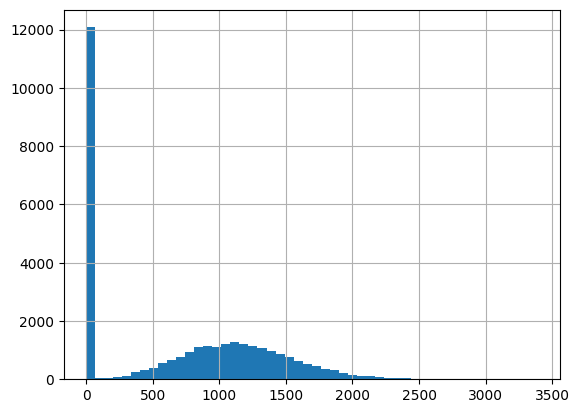

In [55]:
data['Units_sold'].hist(bins = 50)

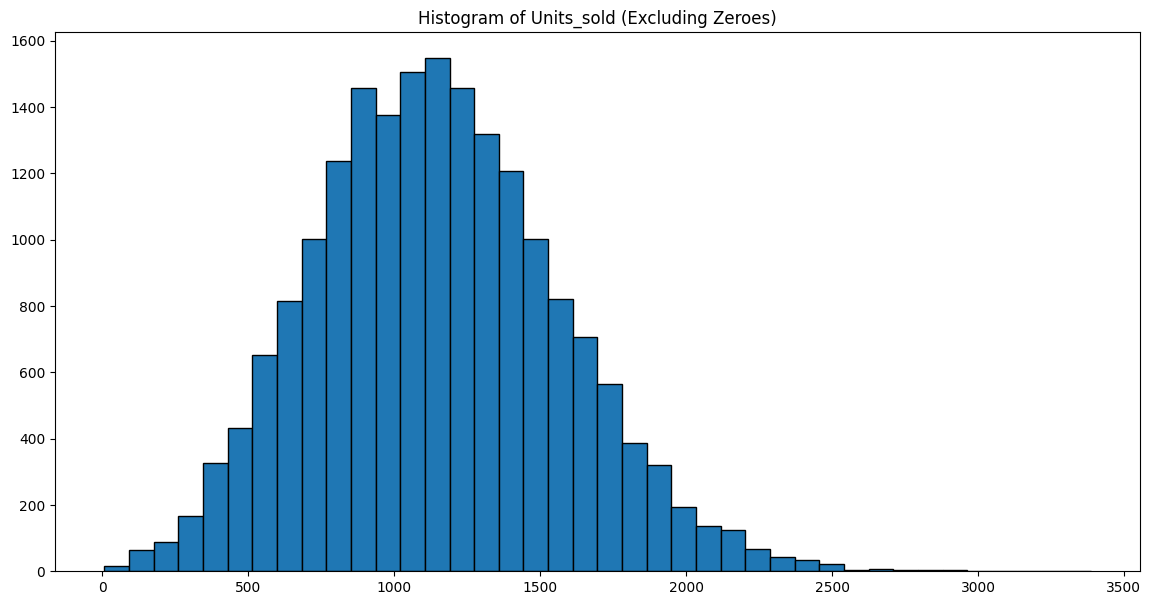

In [56]:
filtered_data = data[data['Units_sold']>0]
plt.figure(figsize=(14,7))
plt.hist(filtered_data['Units_sold'], bins = 40, edgecolor = 'black')
plt.title('Histogram of Units_sold (Excluding Zeroes)')
plt.show()

In [57]:
data['Page_traffic'].corr(data['Units_sold'])

0.8644533046153493

In [58]:
data[(data['Page_traffic'] == 0) & (data['Units_sold']>0)]

,SKU_ID,Date,Page_traffic,Revenue($),Unit_price,Units_sold,Segment,1_Star_Rating,2_Star_Rating,3_Star_Rating,...,Num_of_Promotions,Sum of Spend,Online_Clicks,Online_Cost,Online_Impressions,num_unique_campaigns,Clicks_video,Cost_video,Impressions_video,num_unique_campaigns_offline


In [59]:
data_focus = data[data['Page_traffic']>0]
data_focus.head()

,SKU_ID,Date,Page_traffic,Revenue($),Unit_price,Units_sold,Segment,1_Star_Rating,2_Star_Rating,3_Star_Rating,...,Num_of_Promotions,Sum of Spend,Online_Clicks,Online_Cost,Online_Impressions,num_unique_campaigns,Clicks_video,Cost_video,Impressions_video,num_unique_campaigns_offline
105,SKU1011,2021-01-02,4119.0,4650,6.671449,697,Makeup,29.0,21.0,49.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
106,SKU1011,2021-01-09,4074.0,11435,11.134372,1027,Makeup,36.0,28.0,62.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
107,SKU1011,2021-01-16,4897.0,11603,11.189007,1037,Makeup,38.0,30.0,64.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
108,SKU1011,2021-01-23,4783.0,14067,11.880912,1184,Makeup,38.0,30.0,64.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
109,SKU1011,2021-01-30,3789.0,6188,7.063927,876,Makeup,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [60]:
data_focus.shape

(19631, 28)

In [61]:
data_focus.describe().transpose()

,count,mean,min,25%,50%,75%,max,std
Date,19631,2021-12-31 04:00:00.733533696,2021-01-02 00:00:00,2021-06-26 00:00:00,2022-01-01 00:00:00,2022-07-02 00:00:00,2022-12-31 00:00:00,NaN
Page_traffic,19631.0,3262.629466,5.0,2207.0,3275.0,4249.0,10696.0,1510.350882
Revenue($),19631.0,22854.402476,0.0,16483.5,23098.0,29767.0,48572.0,9638.143686
Unit_price,19235.0,21.491858,0.10303,16.339797,20.700226,25.280734,94.133971,7.845159
Units_sold,19631.0,1115.604197,0.0,825.0,1114.0,1410.0,3386.0,453.048322
1_Star_Rating,12020.0,75.057404,10.0,40.0,68.0,98.0,301.0,44.834974
2_Star_Rating,11889.0,53.646396,7.0,29.0,49.0,71.0,197.0,31.602739
3_Star_Rating,11919.0,144.399278,16.0,75.0,130.0,192.0,557.0,88.950386
4_Star_Rating,11832.0,295.551809,31.0,156.0,261.0,392.0,1180.0,182.9261
5_Star_Rating,11762.0,1941.880292,153.0,1036.0,1701.0,2610.75,7950.0,1230.135878


In [62]:
data_focus.describe(include = 'O')

,SKU_ID,Segment
count,19631,19631
unique,239,3
top,SKU1011,Makeup
freq,105,10631


In [63]:
data_focus.isnull().sum()

,0
SKU_ID,0
Date,0
Page_traffic,0
Revenue($),0
Unit_price,396
Units_sold,0
Segment,0
1_Star_Rating,7611
2_Star_Rating,7742
3_Star_Rating,7712


*  Handling all the null values - Imputing with mean, median, prev or following values or remove the cell

In [65]:
# handling all the null values
a = data_focus[data_focus['Unit_price'].isnull()]['SKU_ID'].unique()
print(a)

['SKU1014' 'SKU1053' 'SKU106' 'SKU1066' 'SKU1067' 'SKU1072' 'SKU1086'
 'SKU1092' 'SKU118' 'SKU1183' 'SKU123' 'SKU1237' 'SKU1245' 'SKU1270'
 'SKU1317' 'SKU1332' 'SKU1458' 'SKU1459' 'SKU1510' 'SKU1531' 'SKU1546'
 'SKU1597' 'SKU1598' 'SKU1625' 'SKU1628' 'SKU1651' 'SKU1719' 'SKU1723'
 'SKU1733' 'SKU1763' 'SKU183' 'SKU1834' 'SKU1911' 'SKU1954' 'SKU1990'
 'SKU225' 'SKU234' 'SKU257' 'SKU278' 'SKU289' 'SKU300' 'SKU305' 'SKU330'
 'SKU352' 'SKU675' 'SKU731' 'SKU761' 'SKU866' 'SKU930' 'SKU937' 'SKU968'
 'SKU989']


In [66]:
# calcualte the proportion of missing values in the 'Unit price' col for those SKU_IDs that have atleast one null value
for i in a:
  print(data_focus[data_focus['SKU_ID'] == i]['Unit_price'].isnull().sum()/data_focus[data_focus['SKU_ID'] == i].shape[0])

1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0


In [67]:
# impute 'Unit_price' null values with median price for each segment again
data_focus['Unit_price'] = data_focus.groupby('Segment')['Unit_price'].transform(lambda x:x.fillna(x.median()))

<ipython-input-67-935d2b701ef8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_focus['Unit_price'] = data_focus.groupby('Segment')['Unit_price'].transform(lambda x:x.fillna(x.median()))


In [68]:
data_focus.isnull().sum()

,0
SKU_ID,0
Date,0
Page_traffic,0
Revenue($),0
Unit_price,0
Units_sold,0
Segment,0
1_Star_Rating,7611
2_Star_Rating,7742
3_Star_Rating,7712


In [69]:
# group the data by 'SKU_ID' and apply forward fill (ffill) to fill the missing values in the specified cols
column_to_fill = ['1_Star_Rating','2_Star_Rating','3_Star_Rating','4_Star_Rating','5_Star_Rating']
data_focus[column_to_fill] = data_focus.groupby('SKU_ID')[column_to_fill].apply(lambda group:group.ffill()).reset_index(level = 0, drop = True)

<ipython-input-69-d732cbbc6e4b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_focus[column_to_fill] = data_focus.groupby('SKU_ID')[column_to_fill].apply(lambda group:group.ffill()).reset_index(level = 0, drop = True)


In [70]:
data_focus.isnull().sum()

,0
SKU_ID,0
Date,0
Page_traffic,0
Revenue($),0
Unit_price,0
Units_sold,0
Segment,0
1_Star_Rating,2786
2_Star_Rating,2952
3_Star_Rating,2930


In [71]:
data_focus[column_to_fill] = data_focus[column_to_fill].fillna(0)

<ipython-input-71-978cbe40021a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_focus[column_to_fill] = data_focus[column_to_fill].fillna(0)


In [72]:
data_focus.isna().sum()

,0
SKU_ID,0
Date,0
Page_traffic,0
Revenue($),0
Unit_price,0
Units_sold,0
Segment,0
1_Star_Rating,0
2_Star_Rating,0
3_Star_Rating,0


In [73]:
# list of cols to fill with the median values within each SKU_ID group
columns_to_fill_with_median = ['Image_Count','Bullet_Count','Title_Count','Description_Length']
# compute median for each col within each SKU_ID group and fill NA values with that median
for col in columns_to_fill_with_median:
  data_focus[col] = data_focus.groupby('SKU_ID')[col].transform(lambda x:x.fillna(x.median()))
data_focus.isna().sum()

/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
<ipython-input-73-3e508c34c3d4>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_focus[col] = data_focus.groupby('SKU_ID')[col].transform(lambda x:x.fillna(x.median()))
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning:

,0
SKU_ID,0
Date,0
Page_traffic,0
Revenue($),0
Unit_price,0
Units_sold,0
Segment,0
1_Star_Rating,0
2_Star_Rating,0
3_Star_Rating,0


In [74]:
data_focus[columns_to_fill_with_median] = data_focus[columns_to_fill_with_median].fillna(data_focus[columns_to_fill_with_median].median())
data_focus.isnull().sum()

<ipython-input-74-ea2ac948ea0b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_focus[columns_to_fill_with_median] = data_focus[columns_to_fill_with_median].fillna(data_focus[columns_to_fill_with_median].median())


,0
SKU_ID,0
Date,0
Page_traffic,0
Revenue($),0
Unit_price,0
Units_sold,0
Segment,0
1_Star_Rating,0
2_Star_Rating,0
3_Star_Rating,0


In [75]:
data_focus['Organic Search Rank'] = data_focus.groupby("SKU_ID")['Organic Search Rank'].apply(lambda group:group.ffill()).reset_index(level = 0, drop = True)

<ipython-input-75-de65fa0072c4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_focus['Organic Search Rank'] = data_focus.groupby("SKU_ID")['Organic Search Rank'].apply(lambda group:group.ffill()).reset_index(level = 0, drop = True)


In [76]:
data_focus.isnull().sum()

,0
SKU_ID,0
Date,0
Page_traffic,0
Revenue($),0
Unit_price,0
Units_sold,0
Segment,0
1_Star_Rating,0
2_Star_Rating,0
3_Star_Rating,0


In [77]:
# apply the backfill for each SKU_ID  group for the specified columns
data_focus['Organic Search Rank'] = data_focus.groupby('Segment')['Organic Search Rank'].transform(lambda x:x.fillna(x.median()))
data_focus.isnull().sum()

<ipython-input-77-6a4ca27f5fe6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_focus['Organic Search Rank'] = data_focus.groupby('Segment')['Organic Search Rank'].transform(lambda x:x.fillna(x.median()))


,0
SKU_ID,0
Date,0
Page_traffic,0
Revenue($),0
Unit_price,0
Units_sold,0
Segment,0
1_Star_Rating,0
2_Star_Rating,0
3_Star_Rating,0


In [78]:
# fill null values in 'num_unique_search_terms'
data_focus['num_unique_Search_Terms'] = data_focus['num_unique_Search_Terms'].fillna(0)
data_focus.isnull().sum()

<ipython-input-78-20d3b4e7bd14>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_focus['num_unique_Search_Terms'] = data_focus['num_unique_Search_Terms'].fillna(0)


,0
SKU_ID,0
Date,0
Page_traffic,0
Revenue($),0
Unit_price,0
Units_sold,0
Segment,0
1_Star_Rating,0
2_Star_Rating,0
3_Star_Rating,0


In [80]:
column_to_fill_2 = ['Sum of Spend','Num_of_Promotions']
# fill the missing values in the list with 0
data_focus[column_to_fill_2] = data_focus[column_to_fill_2].fillna(0)
# check missing values
data_focus.isnull().sum()
column_to_fill_3 = ['Online_Clicks', 'Online_Cost','Online_Impressions', 'num_unique_campaigns']
data_focus[column_to_fill_3] = data_focus[column_to_fill_3].fillna(0)
data_focus.isnull().sum()

<ipython-input-80-4d16d2b8b8d4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_focus[column_to_fill_2] = data_focus[column_to_fill_2].fillna(0)
<ipython-input-80-4d16d2b8b8d4>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_focus[column_to_fill_3] = data_focus[column_to_fill_3].fillna(0)


,0
SKU_ID,0
Date,0
Page_traffic,0
Revenue($),0
Unit_price,0
Units_sold,0
Segment,0
1_Star_Rating,0
2_Star_Rating,0
3_Star_Rating,0


In [81]:
data_focus.fillna(0, inplace = True)
data_focus.isnull().sum()


<ipython-input-81-f9a0b769cb97>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_focus.fillna(0, inplace = True)


,0
SKU_ID,0
Date,0
Page_traffic,0
Revenue($),0
Unit_price,0
Units_sold,0
Segment,0
1_Star_Rating,0
2_Star_Rating,0
3_Star_Rating,0


In [82]:
# unsupervised models
file_path = '/content/Synergic_unsupervised.csv'
data_focus.to_csv(file_path, index = False)


In [83]:
# supervised models
data_final = data_focus.sample(frac = 1, random_state = 1)
data_final.head()

,SKU_ID,Date,Page_traffic,Revenue($),Unit_price,Units_sold,Segment,1_Star_Rating,2_Star_Rating,3_Star_Rating,...,Num_of_Promotions,Sum of Spend,Online_Clicks,Online_Cost,Online_Impressions,num_unique_campaigns,Clicks_video,Cost_video,Impressions_video,num_unique_campaigns_offline
11196,SKU1539,2022-04-09,5835.0,46006,22.214389,2071,Skincare,99.0,72.0,194.0,...,0.0,0.0,1271.0,3102.448115,238075.0,6.0,3479.0,40244.28,3856872.0,2.0
8628,SKU1431,2021-05-08,1881.0,8084,11.870778,681,Skincare,118.0,73.0,200.0,...,0.0,0.0,494.0,1723.716359,75868.0,2.0,0.0,0.00,0.0,0.0
31078,SKU995,2022-12-24,2477.0,24190,27.645714,875,Makeup,108.0,85.0,232.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.00,0.0,0.0
3032,SKU1136,2022-10-08,4087.0,23588,16.896848,1396,Makeup,82.0,64.0,167.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.00,0.0,0.0
23269,SKU528,2022-03-26,1446.0,13446,16.357664,822,Hair Care,29.0,24.0,88.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,6024.0,77040.81,7539723.0,2.0


In [84]:
data_final.shape, data_focus.shape

((19631, 28), (19631, 28))

In [85]:
data_final['Unit_sold>1000'] = (data_final.Units_sold>1000)*1
data_final.columns

Index(['SKU_ID', 'Date', 'Page_traffic', 'Revenue($)', 'Unit_price',
       'Units_sold', 'Segment', '1_Star_Rating', '2_Star_Rating',
       '3_Star_Rating', '4_Star_Rating', '5_Star_Rating', 'Image_Count',
       'Bullet_Count', 'Title_Count', 'Description_Length',
       'num_unique_Search_Terms', 'Organic Search Rank', 'Num_of_Promotions',
       'Sum of Spend', 'Online_Clicks', 'Online_Cost', 'Online_Impressions',
       'num_unique_campaigns', 'Clicks_video', 'Cost_video',
       'Impressions_video', 'num_unique_campaigns_offline', 'Unit_sold>1000'],
      dtype='object')

*  Removing irrelevant data from the dataset:
    *  Date - as we are not interested in derving any date or time related insights.
    *  Revenue - as it is already part of Units_sold(Units_sold = Revenue/Unit_price). So, remove 'Revenue'
    *  'SKU_ID' - identity of the product - no info to extract for the model we intend to develop
    

In [86]:
data_fe = data_final.drop(['SKU_ID', 'Revenue($)'], axis = 1)
data_fe.head()

,Date,Page_traffic,Unit_price,Units_sold,Segment,1_Star_Rating,2_Star_Rating,3_Star_Rating,4_Star_Rating,5_Star_Rating,...,Sum of Spend,Online_Clicks,Online_Cost,Online_Impressions,num_unique_campaigns,Clicks_video,Cost_video,Impressions_video,num_unique_campaigns_offline,Unit_sold>1000
11196,2022-04-09,5835.0,22.214389,2071,Skincare,99.0,72.0,194.0,453.0,3272.0,...,0.0,1271.0,3102.448115,238075.0,6.0,3479.0,40244.28,3856872.0,2.0,1
8628,2021-05-08,1881.0,11.870778,681,Skincare,118.0,73.0,200.0,430.0,3084.0,...,0.0,494.0,1723.716359,75868.0,2.0,0.0,0.00,0.0,0.0,0
31078,2022-12-24,2477.0,27.645714,875,Makeup,108.0,85.0,232.0,511.0,3402.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.00,0.0,0.0,0
3032,2022-10-08,4087.0,16.896848,1396,Makeup,82.0,64.0,167.0,303.0,2058.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.00,0.0,0.0,1
23269,2022-03-26,1446.0,16.357664,822,Hair Care,29.0,24.0,88.0,200.0,1221.0,...,0.0,0.0,0.000000,0.0,0.0,6024.0,77040.81,7539723.0,2.0,0


In [87]:
file_path = '/content/Synergic_unsupervised_data_fe_new.csv'
data_final.to_csv(file_path, index = False)

In [88]:
data_final.drop(['Date', 'SKU_ID', 'Revenue($)'], axis = 1, inplace = True)
file_path = '/content/Synergic_data_preprocessed_new.csv'
data_final.to_csv(file_path, index=False)